In [11]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

import pandas as pd, os, tqdm
import matplotlib.pyplot as plt
import numpy as np, cv2
import _pickle as cPickle

In [12]:
from rafdb_lib import read_view_image as rafdb_read_view_image, hog_feature_extraction, lbp_feature_extraction, read_aligned_image

## Dataset Information

In [13]:
rafdb_info = dict(
    root_dir = "./data/rafdb/basic",
    db_file = "rafdb_basic.hdf5",
    db_name = "data"
)

default_read_settings = dict(
    root_dir = rafdb_info["root_dir"], 
    get_only_face = True, 
    draw_landmarks = False, 
    draw_bbox = False, 
    draw_points = False, 
    verbose = 0, 
    fill_width = 15, 
    line_width = 5
)

label_mapping  = {1: "Surprise", 2: "Fear", 3: "Disgust", 4: "Happiness", 5: "Sadness", 6: "Anger", 7: "Neutral"}
gender_mapping = {0: "male", 1: "female", 2: "unsure"}
race_mapping   = {0: "Caucasian", 1: "African-American", 2: "Asian"}
age_mapping    = {0: "0-3", 1: "4-19", 2: "20-39", 3: "40-69", 4: "70+"}

image_size = (100, 100)

df_rafdb = pd.read_hdf(os.path.join(rafdb_info["root_dir"], rafdb_info["db_file"]), key = rafdb_info["db_name"])

## HOG FEATURE EXTRACTION

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

C:\Anaconda3\envs\cur35\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Feature Shape:  (8100,)
Feature Visualize: 


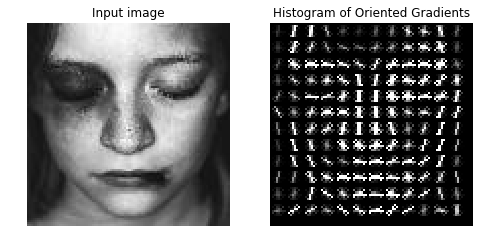

In [14]:
# image, info = rafdb_read_view_image(db = df_rafdb, image_id = "train_00010", **default_read_settings)
image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = "train_01010", verbose = 0)
# image_resized = cv2.resize(image, image_size)

feature = hog_feature_extraction(image[...,::-1], pixels_per_cell=(8, 8), cells_per_block=(3, 3), orientations=9, verbose = 1)

C:\Anaconda3\envs\cur35\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Feature Shape:  (8100,)
Feature Visualize: 


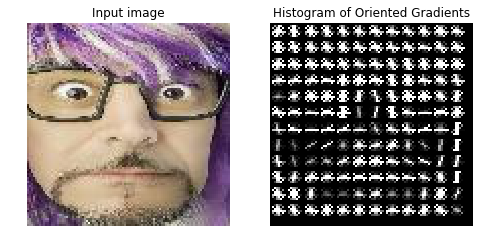

In [8]:
# image, info = rafdb_read_view_image(db = df_rafdb, image_id = "train_00010", **default_read_settings)
image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = "train_00010", verbose = 0)
# image_resized = cv2.resize(image, image_size)

feature = hog_feature_extraction(image[...,::-1], pixels_per_cell=(8, 8), cells_per_block=(3, 3), orientations=9, verbose = 1)

## LBP FEATURE EXTRACTION

https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

LBP in entire image
(100, 100) (26,)


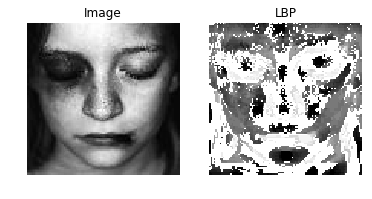

In [9]:
# image, info = rafdb_read_view_image(db = df_rafdb, image_id = "train_00010", **default_read_settings)
image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = "train_01010", verbose = 0)
image_resized = cv2.resize(image, image_size)
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

feature1 = lbp_feature_extraction(image_resized, num_points = 24, radius = 8, entire_image = True, verbose = 1)

LBP in patch images
(1700,)


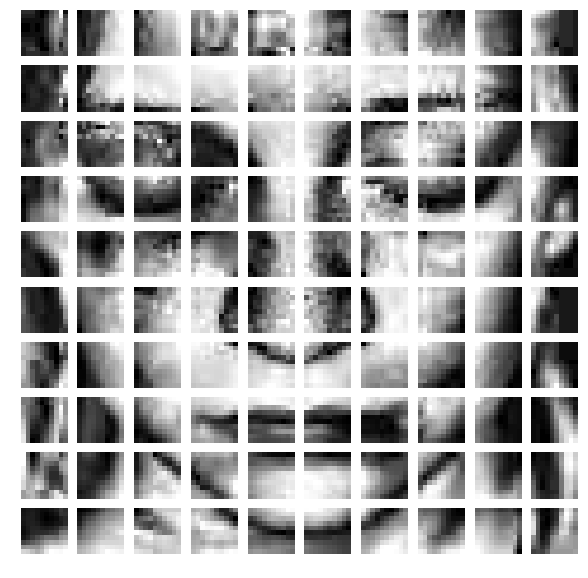

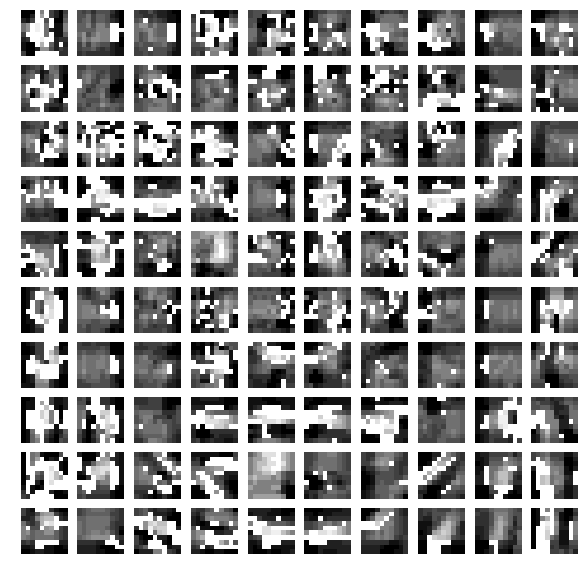

In [10]:
feature2 = lbp_feature_extraction(image_resized, num_points = 15, radius = 3, entire_image = False, verbose = 1)

## FEATURE EXTRACTION ON ALIGNED RAF-DB

### HOG FEATURE

In [7]:
%%time
rafdb_hog_aligned_features = {}
rafdb_hog_aligned_labels = {}
rafdb_hog_aligned_type = {}
for image_id in tqdm.tqdm_notebook(df_rafdb["id"].values):
    image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = image_id, verbose = 0)
    image_resized = cv2.resize(image, image_size)
    
    feature = hog_feature_extraction(image_resized[...,::-1], verbose = 0)
    label   = info["emotion"]
    image_type = info["type"] # train, test
    
    rafdb_hog_aligned_features[image_id] = feature
    rafdb_hog_aligned_labels[image_id] = label
    rafdb_hog_aligned_type[image_id] = image_type
# for

In [8]:
with open("./data/rafdb_hog_aligned_features.pkl", "wb") as f:
    cPickle.dump(rafdb_hog_aligned_features, f)
with open("./data/rafdb_hog_aligned_labels.pkl", "wb") as f:
    cPickle.dump(rafdb_hog_aligned_labels, f)
with open("./data/rafdb_hog_aligned_type.pkl", "wb") as f:
    cPickle.dump(rafdb_hog_aligned_type, f)

### LBP ENTIRE FEATURE

In [61]:
%%time
rafdb_lbpentire_aligned_features = {}
rafdb_lbpentire_aligned_labels   = {}
rafdb_lbpentire_aligned_type = {}
for image_id in tqdm.tqdm_notebook(df_rafdb["id"].values):
    image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = image_id, verbose = 0)
    image_resized = cv2.resize(image, image_size)
    image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    
    feature = lbp_feature_extraction(image_resized, num_points = 24, radius = 8, entire_image = True, verbose = 0)
    label   = info["emotion"]
    image_type = info["type"] # train, test
    
    rafdb_lbpentire_aligned_features[image_id] = feature
    rafdb_lbpentire_aligned_labels[image_id] = label
    rafdb_lbpentire_aligned_type[image_id] = image_type
# for

In [62]:
with open("./data/rafdb_lbpentire_aligned_features.pkl", "wb") as f:
    cPickle.dump(rafdb_lbpentire_aligned_features, f)
with open("./data/rafdb_lbpentire_aligned_labels.pkl", "wb") as f:
    cPickle.dump(rafdb_lbpentire_aligned_labels, f)
with open("./data/rafdb_lbpentire_aligned_type.pkl", "wb") as f:
    cPickle.dump(rafdb_lbpentire_aligned_type, f)

### LBP PATCHING FEATURE

In [64]:
%%time
rafdb_patch_aligned_features = {}
rafdb_patch_aligned_labels   = {}
rafdb_patch_aligned_type = {}
for image_id in tqdm.tqdm_notebook(df_rafdb["id"].values):
    image, info = read_aligned_image(db = df_rafdb, root_dir =  rafdb_info["root_dir"], image_id = image_id, verbose = 0)
    image_resized = cv2.resize(image, image_size)
    image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    
    feature = lbp_feature_extraction(image_resized, num_points = 59, radius = 3, entire_image = False, verbose = 0)
    label   = info["emotion"]
    image_type = info["type"] # train, test
    
    rafdb_patch_aligned_features[image_id] = feature
    rafdb_patch_aligned_labels[image_id] = label
    rafdb_patch_aligned_type[image_id] = image_type
# for

Wall time: 15min 44s


In [65]:
with open("./data/rafdb_patch_aligned_features.pkl", "wb") as f:
    cPickle.dump(rafdb_patch_aligned_features, f)
with open("./data/rafdb_patch_aligned_labels.pkl", "wb") as f:
    cPickle.dump(rafdb_patch_aligned_labels, f)
with open("./data/rafdb_patch_aligned_type.pkl", "wb") as f:
    cPickle.dump(rafdb_patch_aligned_type, f)